In [1]:
from env import Env
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time

13,20
9,23
17,3
<bound method Env.move_A of <env.Env object at 0x000001D8714FBF60>>
<bound method Env.move_B of <env.Env object at 0x000001D86A0D2278>>
<bound method Env.enemy_move of <env.Env object at 0x000001D86A0D2588>>
(13, 22)
(10, 24)


In [16]:
SIZE = 25

NO_EPISODES = 25000
MOVE_PENALTY = -1                                          # reward for each step for agents
CATCH_REWARD = 500                                         # reward for agents if they catch enemy at rhe same time

epsilon = 0.5                                                # randomness
EPS_DECAY = 0.9999                                           # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 1000                                            # how often to play through env visually.

start_q_table = None                                         # if we have a pickled Q table, we'll put the filename of it here.

alpha = 0.1
gamma = 0.95

Agent = 1  # player key in dict
enemy = 2  # food key in dict


# create dic to choose colour
d = {
     1: (0, 255, 0),  # green
     2: (0, 0, 255)}  # red

In [17]:
Q_table = {}
for i in range(-SIZE+1, SIZE):
    for ii in range(-SIZE+1, SIZE):
        for iii in range(-SIZE+1, SIZE):
            for iv in range(-SIZE+1, SIZE):
                Q_table[((i, ii), (iii, iv))] = [np.random.uniform(-5, 0) for i in range(4)]
    

In [18]:
print(Q_table[((5,4), (1,3))])

[-3.082383044781301, -1.5139473506566814, -2.9577241639881935, -2.470343429453546]


In [19]:
episode_rewards = []

on #0, epsilon is 0.5
1000 ep mean: nan
-1980
-2000
-2100
-2017
-2019
-2019
-1991
-1983
-1934
-2120
-2107
-2058
-2037
-2044
-2068
-2004
-2295
-2091
-2106
-2076
-1960
-2046
-2005
-1955
-2027
-2017
-2136
-1976
-2098
-2014
-2062
-2024
-2000
-1951
-1992
-2153
-2109
-2014
-1993
-1984
-2086
-2021
-1997
-2080
-1905
-1973
-1984
-2204
-1978
-2096
-2037
-2013
-2230
-2032
-2071
-2082
-2004
-2077
-2134
-2098
-2002
-1978
-2239
-2046
-2080
-2075
-1921
-2022
-2063
-2114
-2126
-2096
-2091
-2050
-2136
-1989
-2124
-1932
-2087
-2025
-2009
-2013
-1935
-1980
-1903
-2005
-2164
-2010
-1966
-2067
-2036
-2067
-2092
-2129
-2118
-1934
-2053
-2017
-1986
-2178
-2178
-2084
-1977
-470
-2040
-1956
-2152
-2100
-2035
-2072
-1950
-2135
-1966
-1955
-2053
-2113
-2113
-2005
-1990
-1988
-2002
-2087
-2053
-2015
-1904
-2076
-2064
-1956
-1997
-2084
-2002
-1971
-1974
-2035
-1928
-2010
-2120
-2010
-2044
-2057
-2002
-1993
-2078
-281
-2126
-1964
-2131
-2105
-2022
-1957
-2013
-2098
-2086
-2013
-2052
-2109
-2109
-2113
-2051
-1962
-2

-1902
-2028
-1833
-1972
-1831
-1928
-2028
-1845
-1889
-1842
-2031
-1810
-2059
-1940
-1922
-1933
-1964
-1864
-2032
-1911
-2010
-1920
-1981
-2032
-2001
-1896
-1950
-1946
-1939
-1917
-1831
-1926
-1944
-1864
-1987
-1962
-932
-1884
-1935
-1866
-1207
-2008
-1933
-1898
-2010
-1963
-2020
-1983
-1880
-1955
-1809
-1898
-1854
-1979
-1880
-1996
-1985
-1842
-1915
-1932
-1888
-1957
-1871
-2020
-1968
-1906
-1832
-1990
-1895
-1834
-1919
-1842
-1955
-1934
-1981
-1880
-1847
-1829
-1964
-1966
-1971
-1999
-1983
-2008
-1922
-1971
-1875
-1834
-1781
-1945
-2032
-1899
-1889
-1875
-1920
-2004
-1843
-2035
-1886
-1961
-1978
-1998
-1853
-1820
-2042
-1999
-1871
-1972
-1831
-2031
-1862
-1965
-1982
-1876
-2006
-1893
-1836
-1871
-2017
-1862
-1991
-1940
-1807
-1971
-1732
-1904
-2037
-2019
-1922
-1897
-2008
-1905
-1928
-1969
-1885
-1788
-1917
-1741
-1715
-2018
-1787
-1911
-1914
-1789
-1948
-2036
-1853
-1942
-1816
-2001
-1875
-1922
-1877
-1935
-1897
-1983
-2007
-2028
-1995
-2053
-2014
-1847
-1939
-1957
-2062
-1979
-1906

-1671
-1813
-1904
-2012
-1871
-1842
-1655
-1995
-1944
-1924
-1853
-1539
-1866
-1736
-1924
-1873
-1906
-1754
-1842
-1743
-1858
-1875
-1783
-1805
-1811
-1911
-1646
-1932
-1726
-786
-1791
-1769
-1654
-1688
-1545
-1779
-1776
-1794
-1756
-1819
-1939
-1662
-1744
-1743
-1864
-792
-1888
-1620
-1620
-1801
-1822
-1877
-1875
-1877
-1875
-1218
-1723
-1897
-1781
-1774
-1821
-1787
-1759
-1862
-1820
-1940
-1885
-1508
278
-1776
-1813
-1879
-1708
-1920
-1929
-1849
-1902
-1912
-1820
-1774
-1836
-1768
-1884
-1794
-1872
-1897
-1823
-1807
-1925
-1690
-1701
-1842
-1695
-22
-1642
-1732
-1760
-1767
-1906
-1730
-1776
-1805
-1933
-1928
-1583
-1877
-1787
-1792
-1860
-1758
-939
-1842
-1620
-1932
-1803
-1862
-1853
-1754
-1929
-1816
-1866
-1834
-1917
-1939
-1843
-1638
-1752
-1913
-1814
-1613
-1624
-1801
-1873
-1613
-1809
-1686
-1750
-1699
-1772
-1622
-849
-1745
-1673
-1621
-1827
-1811
-1818
-1756
-1759
-1686
-1770
-1734
-1596
-1710
-1880
-1847
-1868
-1745
-1613
-1805
-1741
-1624
-1728
452
-1862
-1876
-1888
-1714
-1

-1686
-1741
201
-1844
-1682
-1697
-948
-1767
-1527
-1725
-1567
-1605
-1679
-1735
-1844
-439
-1710
-1563
-471
-1338
-1400
-1514
-1572
-1873
-1563
-1437
-1794
-1618
-1721
-1455
-1541
-1380
-1396
-20
-1888
-1490
-1710
-1448
-1470
-1752
-1734
-1582
-1835
-1321
-1624
-1796
-1780
-1576
-1517
-1582
-1796
-1893
-1263
-1631
-1798
-1800
-1646
-1204
-1466
-1646
-1629
-1602
-1653
-1746
-1321
-1297
-1572
-1652
-1501
-1538
-1767
-1736
-1644
-1615
-1750
-1433
4
-1840
-1666
432
-1479
-1402
-1807
-1622
-1525
-1413
-1433
-1893
-1701
-1629
-1450
-1779
-1387
-1362
-1318
-1720
-1677
-79
-1506
-158
-1547
-1747
-1523
-1776
-1589
-1495
-1787
-1483
-1470
-1912
-1380
-1622
-500
-1580
-1521
-1558
-543
-1633
-1532
-1468
-1758
-1367
-1492
-1968
-1717
-1745
-1497
-1708
-1439
-1772
-1624
-1730
-1589
-1525
-1323
-1294
-1446
-1558
-1567
-1789
-1602
-1834
-1829
-1631
-1521
-1767
-1574
-1499
-1873
-1841
-1393
-1743
-1849
-335
-1721
-1712
-1684
-1877
-277
214
-1448
-1743
-1680
-1697
-1752
-1346
-1558
-1712
-1721
-1103
-1

-1141
-1602
-1492
-1079
-1420
-1556
-1255
-1138
-37
-1686
-1615
-1417
-1508
-1362
-1615
-1059
-1615
-1417
-144
-1305
-86
-1230
-1329
-1195
-1435
-489
-1041
-308
-1556
-375
-1638
-1499
-1321
-1402
-1041
-1327
-273
-1811
-1189
-313
-587
-1688
-1173
54
-768
-1470
-1761
262
-1833
-1593
-1329
-795
-1523
-1545
-1195
-1228
-1624
-1096
-1591
-1441
-1393
-1030
-993
-1490
-1514
-1354
-1591
-1290
216
-1563
-1186
-1745
-1424
-1596
-1339
-494
-1635
-1547
-1291
-1149
-1470
-1237
-1545
-1510
-1640
-1741
45
206
-799
-723
-1150
-184
-1425
-17
-843
-1041
-432
-1174
-1802
-1387
-1235
-1618
-1402
-1602
-1677
-311
-128
269
-1418
-1604
135
-1349
-933
-1528
-1701
-1648
-1528
-1561
-1448
-1239
-1358
-995
-1369
-1164
-1061
-1756
-1499
-1648
-1305
-493
-1013
-911
-1888
-1373
26
-1205
440
-1175
-1268
-1677
-1294
-1618
-1238
-1629
-1208
-1362
-1483
-1050
-1554
-1494
-1637
-1208
-1116
-1226
-1503
-1420
-275
-1343
-1550
-661
-1230
-1070
-1635
-1484
-1450
-1263
-954
158
-996
-1281
-1383
-1312
-1305
-1563
-1604
-874


460
243
68
-157
-742
-509
-894
-1417
-403
-1285
-1409
-1037
-75
-1140
-722
284
-1831
-1162
-547
-940
-643
-581
-1228
-729
-942
-1666
-1798
-1118
480
12
-689
-331
-1384
-1041
-700
-867
-872
-1259
-1160
-1164
-747
-614
-1299
-984
350
-412
-760
-143
-1609
-1369
-1085
-1162
on #7000, epsilon is 0.2482839612256115
1000 ep mean: -937.386
-96
-1424
-335
-1721
-859
429
644
-1538
-141
-1094
-1228
-1138
-1103
-784
-762
-1371
-1636
198
-1318
-1506
-430
-1395
-701
-1670
-588
-623
52
-978
-1602
-1149
-101
-896
422
-1129
-33
598
-944
-852
-1074
135
-1057
-1215
-980
418
-1039
-1283
-1554
-953
-1637
-1098
-1532
-1624
-1340
-975
132
-1065
-984
212
-1131
-909
-1193
-911
-1165
-699
-259
-841
-1303
-1589
361
18
-1439
-1413
-1204
-1440
-1184
-141
-865
-1352
-1307
-1305
-1052
-786
-1208
-920
-1215
-942
-1041
463
-997
-216
-874
-1391
-1250
-709
-606
-1510
-1070
-1349
-1129
-489
-993
-966
-962
-1437
384
-1231
-1215
-359
-1404
-1490
-832
-735
-1142
-590
-1109
188
-1252
-1393
-788
392
-1053
-1483
-1145
-1481
-1

-1118
-1230
-47
-1006
-372
72
-909
464
-742
-82
92
671
-472
699
483
514
-414
1171
-338
419
769
1196
-512
818
-144
-445
-93
752
-348
569
559
56
951
1115
-122
112
833
611
556
-1028
-383
-863
706
553
231
-599
-907
-5
-278
574
195
65
1695
-311
1163
437
777
-401
479
321
1124
-113
1031
29
544
-51
262
738
125
481
549
-42
995
322
-32
-1096
395
373
697
260
151
529
-982
-599
490
204
888
230
351
783
-348
-548
-740
1492
148
-500
168
-511
732
1267
-628
177
145
169
543
180
549
-427
740
791
-390
-1076
-100
-1505
-889
-148
875
631
351
689
774
-71
653
-192
334
1000
434
614
28
-388
501
369
-636
690
-416
1130
-94
406
368
-513
-1021
1020
-573
-141
-53
610
1371
299
195
46
48
-377
334
1401
415
-147
1467
-555
767
-1131
329
142
696
-64
864
-1138
-401
-359
-264
455
921
1540
-801
809
570
-929
191
643
730
-757
-330
-203
359
-1
-308
1478
138
663
-262
705
430
1170
418
233
633
785
-71
-1538
375
-268
923
-1081
-53
516
-421
4
958
-141
451
871
114
-551
449
790
300
668
-166
-1081
-525
193
-127
-111
265
263
943
-876
328

525
235
798
-403
531
-691
373
-189
1401
1268
346
1064
138
984
1753
-559
537
1381
-104
292
915
1392
1318
1172
301
491
1881
197
736
1012
259
798
783
1145
1330
1206
740
148
903
721
80
1025
596
-84
158
708
-810
576
193
261
1165
939
-579
-194
657
465
356
676
-282
529
270
81
749
831
739
1092
898
-854
768
571
930
281
-326
478
1644
1029
-344
570
333
520
516
424
-553
-5
-93
388
-711
651
891
283
517
838
1751
896
1258
125
918
721
1207
281
1640
1304
1405
736
1273
519
701
-156
624
826
702
470
-335
1485
-1160
524
296
-942
552
-76
523
892
702
590
1368
2284
37
-977
464
987
548
604
1119
681
1366
963
-150
987
326
1047
730
-91
87
-991
189
-218
261
494
334
1028
829
433
835
470
237
487
514
-258
123
858
1240
1168
-347
684
39
531
746
398
527
1522
1212
509
1242
514
1438
1132
19
996
411
447
1310
1152
930
485
536
1068
178
512
520
1410
1698
1197
-1037
-724
244
469
862
-1032
-55
-1010
860
429
274
211
-63
1194
366
756
-269
650
147
-15
-698
706
1326
470
616
431
1102
786
867
424
491
859
298
873
103
534
-1064
-40
128

1337
40
918
800
809
651
512
1585
-97
415
713
773
1196
785
-182
1506
1289
1729
482
1338
-161
382
668
618
1075
527
1085
1706
725
267
514
-14
1328
1396
292
1073
1368
622
-537
994
719
850
932
781
1213
1242
-299
1478
419
1914
709
79
61
2250
498
682
932
730
-652
428
35
1889
730
-130
1075
292
1577
1762
-468
149
481
1104
450
-95
950
644
495
1891
1015
1027
1268
1128
1049
-282
914
1522
305
-234
-861
875
259
816
634
777
1104
588
574
1004
1357
1278
1315
-251
1756
518
574
840
1577
-69
912
-88
1081
629
1348
989
304
167
635
660
2030
911
417
1491
1278
281
310
-1261
364
2155
1938
-1052
1102
73
1590
134
1323
761
530
645
774
272
1028
315
897
1509
-931
998
1123
457
870
-214
-336
642
1411
1598
1568
665
1568
1278
1589
1054
1834
-515
565
1840
505
626
1352
1698
1740
644
893
1778
1663
552
841
576
1564
1385
1223
640
600
902
1064
177
604
1788
255
1162
782
1046
482
574
836
559
1434
730
607
1987
726
821
1073
1128
863
400
1176
956
-237
622
349
1031
1528
1949
-7
535
238
8
503
1597
1410
724
916
591
1040
831
763
391
-

1414
562
578
1363
819
-386
118
616
982
1537
1043
1124
694
1612
1575
1491
508
1278
1401
1339
59
260
829
686
1258
1753
1924
74
523
1454
1134
743
1935
1172
1104
1245
670
-39
44
1038
514
1728
-104
-295
1177
1203
1322
772
2692
1108
974
1427
1982
1489
787
202
676
-236
1830
1250
1250
-53
1150
402
244
595
919
645
1256
-812
639
180
771
1370
905
1734
772
557
867
236
219
-372
912
926
351
1334
953
466
661
1563
697
1525
1340
1364
752
697
-940
1322
on #16000, epsilon is 0.10094018292126271
1000 ep mean: 867.619
2116
1467
823
597
923
-75
1121
271
1718
357
1509
1060
433
892
877
502
1040
560
684
1559
927
833
641
1350
521
827
600
1016
1621
2413
332
557
713
607
1852
1647
669
1663
1773
2016
941
237
668
2226
1403
455
1504
1517
714
857
2034
257
569
-333
428
1696
860
939
763
1546
689
284
1066
1157
239
515
1291
961
908
940
851
1373
963
504
1471
-645
332
511
1009
403
1775
1744
939
759
552
1711
1883
553
189
1524
519
667
596
1308
1524
1318
235
1544
-445
57
2446
-141
1204
195
694
206
919
604
721
497
59
740
367
66

1425
1005
915
1170
193
1095
1066
1740
470
244
2013
2221
1302
393
626
1254
1872
939
951
1026
1518
528
853
2578
358
1145
2689
1743
1489
2166
1559
2442
400
1141
-42
257
2169
1566
716
968
1099
611
822
521
950
540
1563
2179
2141
2111
1286
1983
2013
637
484
1408
-27
403
847
954
1869
620
1492
2288
1669
798
910
852
989
1040
413
1776
443
523
1185
-652
1971
559
772
471
653
1358
1240
1997
468
1640
1349
950
1230
137
572
1663
2437
1179
789
81
1214
1891
2207
755
3177
2905
2039
1178
1662
81
875
1904
464
497
9
2488
-108
1187
2292
554
1348
2046
445
418
1132
1318
2362
968
-458
724
679
291
1874
1379
1300
675
97
554
639
615
638
1526
1387
455
1477
193
2066
662
916
789
664
1128
1332
1842
2584
1075
503
1489
1211
1796
2338
2131
1995
1632
939
992
585
2250
1009
1019
1040
629
886
1387
638
832
1225
1665
1524
1697
1606
812
810
-5
1028
-764
1828
1533
1082
421
1126
1125
1170
19
610
1639
1524
234
-144
53
1634
381
1687
165
868
1036
1575
2030
2325
1059
46
1080
1627
428
906
897
657
868
407
700
1582
2292
811
1207
1458
22

2096
875
452
1629
1385
1421
359
223
2917
817
1232
1535
1929
325
983
849
604
2158
443
2
1593
492
2616
508
1955
2595
1299
1152
420
908
1443
1287
415
1025
1359
718
1684
598
765
843
1667
1753
483
1421
596
596
1632
1678
1123
1355
2432
516
510
1107
1828
1554
912
1563
1401
1494
552
330
753
-89
1256
597
525
2250
1428
1871
-61
-350
594
531
642
1685
-1340
2017
2017
1341
1197
1016
1113
1741
842
138
-458
1561
1595
862
1128
1884
279
1060
1016
1043
615
1773
1363
812
440
971
1444
1880
1332
596
2567
127
809
1925
1489
1632
2507
2745
1638
2479
1122
892
1671
662
1366
1401
2459
1316
1298
791
398
52
1280
663
950
453
-242
739
163
562
917
1111
1131
772
2235
2369
451
338
787
1999
887
2484
1370
1160
543
2833
944
626
333
1801
1972
1261
1194
1484
1434
268
2037
1194
1491
1322
1249
1225
1874
364
1190
1004
56
987
1396
1398
787
1393
931
679
1747
499
1005
1301
-526
1718
1335
78
1423
1043
846
1256
884
1053
-691
1424
2389
1653
819
1098
1705
776
747
2173
829
1237
1707
1562
650
939
2
367
2880
756
1534
975
600
1662
281
11

2062
-148
434
530
1161
2078
558
595
1488
1291
1373
1557
398
1075
1623
1511
2467
1245
674
767
679
733
698
523
1295
1344
805
1110
261
1093
1487
1322
1145
1630
1280
1440
1346
2259
2211
1357
651
1823
471
2208
1132
679
589
1616
440
1647
664
656
1079
892
2213
616
1391
307
1762
1412
1348
358
1930
1374
1808
1212
937
536
305
336
1577
147
1173
1513
2481
821
785
2042
860
1105
1047
389
760
562
1124
1157
2286
1324
1198
2133
1023
2459
1489
775
790
1447
1828
510
688
2472
1929
1275
1156
630
1581
449
661
-399
2095
377
488
1454
1997
2125
1403
2715
1181
1401
-192
559
1897
2039
1379
1389
608
1352
476
292
1889
1295
1993
1101
893
498
1762
1685
2110
1863
1896
2798
2112
897
-1362
462
1746
1202
1852
519
1255
904
789
1445
1377
1824
2364
1016
545
1029
1148
883
710
603
667
1720
1684
2022
855
155
846
768
611
158
861
1169
1427
995
701
2276
1575
699
1062
1214
972
585
1181
884
1361
2443
162
1786
1629
1622
1013
524
1150
2127
-341
1256
1234
2199
1839
2774
1685
706
1471
958
1608
910
956
1784
492
1709
669
443
1159
406
11

-35
450
901
1466
1389
2837
1927
1439
284
2579
1511
130
640
888
1720
1564
1667
on #23000, epsilon is 0.05012365692505809
1000 ep mean: 1307.921
1517
1009
1136
636
2611
2751
2180
431
1975
1413
1752
583
697
635
2481
923
477
2362
2015
584
1066
823
981
1146
1453
1157
507
588
561
904
2672
779
1
586
1687
1338
1619
402
1227
2438
1616
1395
897
1705
756
525
78
2395
2237
1401
2334
1687
1561
990
1428
287
972
591
476
754
1486
2644
297
620
1827
1334
2092
2241
2138
187
1463
673
657
1852
1895
2040
285
741
267
2452
647
47
1850
704
1342
1787
636
2059
494
1897
345
1665
1015
253
589
1850
740
2327
371
282
1334
1443
1313
2644
1707
467
1803
2683
897
1623
1610
235
1298
1160
1169
1054
1591
2072
2006
2094
2241
1885
1023
643
1808
580
1949
521
941
1224
2391
1025
913
1040
2078
519
892
1403
44
1069
2340
439
1808
2048
579
2083
283
2582
2503
867
1513
2281
-427
1141
1020
1076
1569
433
706
2422
1386
1614
1680
2076
2122
1307
164
2316
985
135
1205
1246
79
2476
654
423
2889
-784
607
2338
2127
2063
1759
2063
1106
2836
2011

1146
2090
1589
510
1709
2132
247
1064
182
1072
2743
2144
598
1872
2479
2059
750
1393
1701
1775
481
1872
893
578
2611
1189
1306
1372
1748
587
2510
573
1192
1729
2182
2446
2479
430
589
565
2270
2292
1231
1203
2503
2037
712
1576
891
852
710
631
477
543
2022
2195
842
1531
-610
284
2367
539
864
2260
1023
1575
2326
1148
1097
1268
178
776
1699
503
2303
2686
1911
1239
761
177
1718
2314
1454
654
402
728
1020
1698
914
1489
1093
1945
593
1955
1950
2253
1407
2454
1845
842
145
557
-132
1344
1185
893
1880
332
716
1489
455
827
1486
2499
1588
722
1925
1399
1311
1898
-217
596
1878
2530
1277
434
431
1221
2066
1395
1578
321
2378
2481
1104
2412
-20
398
501
966
2272
2327
707
1003
1638
437
1927
1630
2789
912
1247
-435
2642
354
766
2428
1256
1643
559
2565
864
2357
451
183
1137
2584
1040
1003
2193
1236
1157
2122
2013
1418
2697
1643
79
507
2686
1896
1088
2095
2050
-511
944
560
1872
1192
442
-6
2195
1839
2468
612
854
1836
1074
2096
2435
801
1799
2690
1596
2525
1328
822
541
861
1918
1970
1283
1793
2875
1115
1720

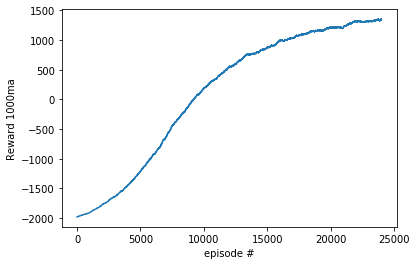

In [20]:
for episode in range(NO_EPISODES):
    Agent_A = Env()
    Agent_B = Env()
    Enemy.x = 8
    Enemy.y = 8
    
    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}, epsilon is {epsilon}")
        print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False
        
    episode_reward = 0
    for i in range(2000):
        obs = (Agent_A - Enemy, Agent_B - Enemy)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(Q_table[obs])
            #print(action)
        else:
            action = np.random.randint(0, 4)
            #print(action)
        # Take the action!
        Agent_A.action_A(action)
        Agent_B.action_B(action)
        #Enemy.enemy_move()
        
        if Agent_A.x == Enemy.x and Agent_A.y == Enemy.y and Agent_B.x == Enemy.x and Agent_B.y == Enemy.y:
            reward = CATCH_REWARD
                
        elif Agent_A.x == Agent_B.x and Agent_A.y == Agent_B.y:
            reward = -10
            
        elif Agent_A.x == Enemy.x and Agent_A.y == Enemy.y:
            reward = 10
            
        elif Agent_B.x == Enemy.x and Agent_B.y == Enemy.y:
            reward = 10
        
        
        else:
            reward = MOVE_PENALTY
            
        new_obs = ((Agent_A - Enemy, Agent_B - Enemy))
        
        if np.random.random() > epsilon:
            # GET THE ACTION
            new_action = np.argmax(Q_table[obs])
            #print(action)
        else:
            new_action = np.random.randint(0, 4)
            #print(action)
        # Take the action!
        #Agent_A.action_A(new_action)
        #Agent_B.action_B(new_action)
        #Enemy.enemy_move()
        
        Q_table[obs][action] = Q_table[obs][action] + alpha*(reward + (gamma*Q_table[new_obs][new_action]) - Q_table[obs][action])
        #print(Q_table)
        
        new_action = action
        new_obs = obs
        
        if show:
            env = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)  # starts an rbg of our size
            env[Agent_A.x][Agent_A.y] = d[Agent]
            env[Agent_B.x][Agent_B.y] = d[Agent]# sets the agent location tile to green color
            env[Enemy.x][Enemy.y] = d[enemy]  # sets the enemy tile to red
              
            img = Image.fromarray(env, 'RGB')  
            img = img.resize((300, 300))  # resizing so we can see our agent in all its glory.
            cv2.imshow("image", np.array(img))  # show it!
            if reward == CATCH_REWARD:
                #cv2.VideoCapture('training.mp4')
                if cv2.waitKey(500) & 0xFF == ord('q'):
                    break
            else:
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        episode_reward += reward
        if reward == CATCH_REWARD or reward == -400:
            break
            
    print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY
    
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}ma")
plt.xlabel("episode #")
plt.show()   

        
        
        
        
        